In [1]:
import subprocess
import os
import time
import numpy as np
import open3d as o3d
import re

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## set dataset and GoF

In [2]:
dataset = 'drinking'
GoF = 7

In [3]:
input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))

output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
print(input_dir)
print(output_root_dir)

G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Thomas\meshes
G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Thomas


## Encode

In [3]:
dataset = 'drinking'

In [4]:
input_dir = r'G:\VS2022Projects\arap-volume-tracking-main\data\scene\meshes\good'
output_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\encode_Draco', dataset)

obj_files = [f for f in os.listdir(input_dir) if f.endswith('.obj')]

qps = range(7,21) # qp from 0 to 14, small qp (qp <=3 or 4) is meaningless

for qp in qps:
    times = []
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)

    output_file = os.path.join(output_dir, f'encoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_encoding_time = 0
        for obj_file in obj_files:

            input_path = os.path.join(input_dir, obj_file)
            output_path = os.path.join(output_dir, obj_file.replace('.obj', f'_qp_{qp}.drc'))

            start_time = time.time()

            result = subprocess.run([
                            r'G:\Github\draco\build\Debug\draco_encoder',
                            '-i', input_path,
                            '-o', output_path,
                            '-qp', str(qp)
                            ], capture_output=True, text=True)
            print(result.stdout)
            
            # List to store extracted times
            
            # Regular expression to match the encoding time
            time_pattern = re.compile(r"\((\d+) ms to encode\)")
            
            # Loop through each line and extract the time
            match = time_pattern.search(result.stdout)
            if match:
                times.append(int(match.group(1)))
                        
            end_time = time.time()

            encoding_time = end_time - start_time
            total_encoding_time += encoding_time
            #print(f"Encoded {obj_file} in {encoding_time:.4f} seconds")
            #f.write(f"Encoded {obj_file} in {encoding_time:.4f} seconds\n")
            
        if times:
                mean_time = sum(times) / len(times)
                print(f"Mean encoding time: {mean_time:.2f} ms")
        total_files = len(obj_files)
        

        #f.write(f"\nTotal encoding time for qp {qp}: {total_encoding_time:.4f} seconds\n")
        f.write(f"Average encoding time for qp {qp}: {mean_time:.2f} seconds\n\n")


Encoder options:
  Compression level = 7
  Positions: Quantization = 7 bits

Encoded mesh saved to G:\PycharmProjects\scene_compression\Results\encode_Draco\drinking\drinking_qp_7\mesh_0001_qp_7.drc (935 ms to encode).

Encoded size = 63790 bytes

For better compression, increase the compression level up to '-cl 10' .


Encoder options:
  Compression level = 7
  Positions: Quantization = 7 bits

Encoded mesh saved to G:\PycharmProjects\scene_compression\Results\encode_Draco\drinking\drinking_qp_7\mesh_0002_qp_7.drc (887 ms to encode).

Encoded size = 63436 bytes

For better compression, increase the compression level up to '-cl 10' .


Encoder options:
  Compression level = 7
  Positions: Quantization = 7 bits

Encoded mesh saved to G:\PycharmProjects\scene_compression\Results\encode_Draco\drinking\drinking_qp_7\mesh_0003_qp_7.drc (915 ms to encode).

Encoded size = 63649 bytes

For better compression, increase the compression level up to '-cl 10' .


Encoder options:
  Compression lev

## Decode

In [5]:
input_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\decode_Draco', dataset)
print(input_root_dir)
print(output_root_dir)

G:\PycharmProjects\scene_compression\Results\encode_Draco\drinking
G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking


In [6]:
input_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\decode_Draco', dataset)
os.makedirs(output_root_dir, exist_ok=True)


qps = range(7,21)

for qp in qps:
    times = []
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    output_file = os.path.join(output_dir, f'decoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_decoding_time = 0
        for drc_file in drc_files:
            input_path = os.path.join(input_dir, drc_file)
            output_path = os.path.join(output_dir, drc_file.replace(f'_qp_{qp}.drc', f'_qp_{qp}_decoded.obj'))
            start_time = time.time()

            # Use subprocess to execute the draco_decoder command
            result = subprocess.run([
                                    r'G:\Github\draco\build\Debug\draco_decoder', 
                                    '-i', input_path,
                                    '-o', output_path
                                    ], capture_output=True, text=True)
            print(result.stdout)
            
            end_time = time.time()
            time_pattern = re.compile(r"\((\d+) ms to decode\)")
            
            # Loop through each line and extract the time
            match = time_pattern.search(result.stdout)
            if match:
                times.append(int(match.group(1)))

            decoding_time = end_time - start_time
            total_decoding_time += decoding_time
            
        total_files = len(drc_files)
        if times:
                mean_time = sum(times) / len(times)
                print(f"Mean encoding time: {mean_time:.2f} ms")
        total_files = len(obj_files)
        

        #f.write(f"\nTotal encoding time for qp {qp}: {total_encoding_time:.4f} seconds\n")
        f.write(f"Average decoding time for qp {qp}: {mean_time:.2f} seconds\n\n")



Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0001_qp_7_decoded.obj (223 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0002_qp_7_decoded.obj (221 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0003_qp_7_decoded.obj (210 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0004_qp_7_decoded.obj (208 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0005_qp_7_decoded.obj (206 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decode_Draco\drinking\drinking_qp_7\mesh_0006_qp_7_decoded.obj (204 ms to decode)

Decoded geometry saved to G:\PycharmProjects\scene_compression\Results\decod

## Calculate Bitrate

In [7]:
frame_rate = 30 # the requirement for real-time (30 fps in both encoder/decoder) performance
number_frames = 7

In [8]:
import os

def calculate_bitrate(file_size, duration):
    return file_size * 8 / duration

input_root_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\encode_Draco', dataset)

qps = range(7,21) # qp < 6 is useless
for qp in qps:
    total_size = 0
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    
    for i in range(0, number_frames):
        file_path = os.path.join(input_dir, drc_files[i])
        file_size = os.path.getsize(file_path)
        total_size += file_size

    total_duration = number_frames / frame_rate
    overall_bitrate = calculate_bitrate(total_size, total_duration)
    
    print(f"Total Size of {number_frames} DRC Files: {total_size} bytes")
    print(f"Overall Bitrate: {overall_bitrate} bits per second")

    bitrate_kbps = overall_bitrate / 1000
    bitrate_mbps = overall_bitrate / 1000000
    

    print(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps")
    print(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps")
    
    output_file = os.path.join(input_dir, f'{dataset}_qp_{qp}_GoF_{number_frames}_bitrate_info.txt')
    with open(output_file, 'w') as file:
        file.write(f"Total Size of {number_frames} DRC Files: {total_size} bytes\n")
        file.write(f"Overall Bitrate: {overall_bitrate} bits per second\n")
        file.write(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps\n")
        file.write(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps\n")
    
    print("Bitrate information has been saved to 'bitrate_info.txt'")

Total Size of 7 DRC Files: 442485 bytes
Overall Bitrate: 15170914.285714285 bits per second
Overall Bitrate: 15170.91 Kbps
Overall Bitrate: 15.17 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 7 DRC Files: 525661 bytes
Overall Bitrate: 18022662.85714286 bits per second
Overall Bitrate: 18022.66 Kbps
Overall Bitrate: 18.02 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 7 DRC Files: 647534 bytes
Overall Bitrate: 22201165.714285713 bits per second
Overall Bitrate: 22201.17 Kbps
Overall Bitrate: 22.20 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 7 DRC Files: 823680 bytes
Overall Bitrate: 28240457.14285714 bits per second
Overall Bitrate: 28240.46 Kbps
Overall Bitrate: 28.24 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 7 DRC Files: 1027753 bytes
Overall Bitrate: 35237245.71428572 bits per second
Overall Bitrate: 35237.25 Kbps
Overall Bitrate: 35.24 Mbps
Bitrate information

## Get error

In [9]:
def compute_D1_psnr(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        #MSE += np.square(original_vertices[i] - decoded_vertices[index])
        MSE += np.square(np.linalg.norm(original_vertices[i] - decoded_vertices[index]))
    MSE = MSE / len(original_vertices)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr
# keep order of loaded files
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

In [10]:
def compute_D2_psnr(original_mesh, decoded_mesh):
    decoded_mesh.compute_vertex_normals()
    
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_decoded.normals = o3d.utility.Vector3dVector(decoded_mesh.vertex_normals)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.dot((original_vertices[i] - decoded_vertices[index])[0], np.array(pcd_decoded.normals)[index][0]))
    MSE = MSE / len(original_vertices)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr

def compute_MSE_RMSE(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.linalg.norm(original_vertices[i] - decoded_vertices[index]))
    MSE = MSE / len(original_vertices)
    #print("MSE:", MSE)
    RMSE =np.sqrt(MSE)
    
    return np.log10(MSE), np.log10(RMSE)

from scipy.spatial.distance import directed_hausdorff
def compute_Hausdorff(original_mesh, decoded_mesh):
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    hausdorff = directed_hausdorff(original_vertices, decoded_vertices)
    return hausdorff[0] * 1e4


In [11]:
original_input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
decoded_input_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\decode_Draco', dataset)

files = os.listdir(original_input_dir)
original_obj_files = [file for file in files if file.endswith('.obj')]

original_obj_files.sort(key=extract_number)
    
qps = range(7,21)
result_file_path = os.path.join(r'G:\PycharmProjects\scene_compression\Results', f'{dataset}_D1_PSNR_results.txt')
with open(result_file_path, 'w') as result_file:
    for qp in qps:
        d1_psnr_values = []
        decoded_obj_path = os.path.join(decoded_input_dir, f'{dataset}_qp_{qp}')
        files = os.listdir(decoded_obj_path)
        decoded_obj_files = [file for file in files if file.endswith('.obj')]
        for i in range(len(original_obj_files)):
            original_mesh = o3d.io.read_triangle_mesh(os.path.join(original_input_dir, original_obj_files[i]))
            decoded_mesh = o3d.io.read_triangle_mesh(os.path.join(decoded_obj_path, decoded_obj_files[i]))
            d1_psnr = max(compute_D1_psnr(original_mesh, decoded_mesh), compute_D1_psnr(decoded_mesh, original_mesh))
            d1_psnr_values.append(d1_psnr)
            
        avg_psnr_5 = np.mean(d1_psnr_values[:5])
        avg_psnr_10 = np.mean(d1_psnr_values[:10])
        avg_psnr_15 = np.mean(d1_psnr_values[:15])
        avg_psnr = np.mean(d1_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D1 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D1 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D1 PSNR: {avg_psnr_15}\n")
        
        print(f"qp={qp}, Number of frames: {len(original_obj_files)}, Average D1 PSNR: {avg_psnr}\n")

qp=7, Number of frames: 7, Average D1 PSNR: 49.26897586201107

qp=8, Number of frames: 7, Average D1 PSNR: 55.22935911526394

qp=9, Number of frames: 7, Average D1 PSNR: 61.29262517883266

qp=10, Number of frames: 7, Average D1 PSNR: 67.29225184343792

qp=11, Number of frames: 7, Average D1 PSNR: 73.33826779407475

qp=12, Number of frames: 7, Average D1 PSNR: 79.39481328141606

qp=13, Number of frames: 7, Average D1 PSNR: 85.39275024672092

qp=14, Number of frames: 7, Average D1 PSNR: 91.41957017393345

qp=15, Number of frames: 7, Average D1 PSNR: 97.43043829147359



KeyboardInterrupt: 

In [12]:
def compute_D2_psnr(original_mesh, decoded_mesh):
    decoded_mesh.compute_vertex_normals()
    
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_decoded.normals = o3d.utility.Vector3dVector(decoded_mesh.vertex_normals)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.dot((original_vertices[i] - decoded_vertices[index])[0], np.array(pcd_decoded.normals)[index][0]))
    MSE = MSE / len(original_vertices)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr

def compute_MSE_RMSE(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.linalg.norm(original_vertices[i] - decoded_vertices[index]))
    MSE = MSE / len(original_vertices)
    #print("MSE:", MSE)
    RMSE =np.sqrt(MSE)
    
    return np.log10(MSE), np.log10(RMSE)

from scipy.spatial.distance import directed_hausdorff
def compute_Hausdorff(original_mesh, decoded_mesh):
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    hausdorff = directed_hausdorff(original_vertices, decoded_vertices)
    return hausdorff[0] * 1e4


In [ ]:
dataset = 'Dancer'

In [13]:
original_input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
decoded_input_dir = os.path.join(r'G:\PycharmProjects\scene_compression\Results\decode_Draco', dataset)

files = os.listdir(original_input_dir)
original_obj_files = [file for file in files if file.endswith('.obj')]

original_obj_files.sort(key=extract_number)
    
qps = range(7,21)
result_file_path = os.path.join(r'G:\PycharmProjects\scene_compression\Results', f'{dataset}_results.txt')
with open(result_file_path, 'w') as result_file:
    for qp in qps:
        d2_psnr_values = []
        d1_psnr_values = []
        mses = []
        rmses = []
        hausdorffs = []
        decoded_obj_path = os.path.join(decoded_input_dir, f'{dataset}_qp_{qp}')
        files = os.listdir(decoded_obj_path)
        decoded_obj_files = [file for file in files if file.endswith('.obj')]
        for i in range(len(original_obj_files)):
            original_mesh = o3d.io.read_triangle_mesh(os.path.join(original_input_dir, original_obj_files[i]))
            decoded_mesh = o3d.io.read_triangle_mesh(os.path.join(decoded_obj_path, decoded_obj_files[i]))
            d2_psnr = max(compute_D2_psnr(original_mesh, decoded_mesh), compute_D2_psnr(decoded_mesh, original_mesh))
            d2_psnr_values.append(d2_psnr)
            d1_psnr = max(compute_D1_psnr(original_mesh, decoded_mesh), compute_D1_psnr(decoded_mesh, original_mesh))
            #print("D1:", d1_psnr)
            d1_psnr_values.append(d1_psnr)

        
            logmse1, logrmse1 = compute_MSE_RMSE(original_mesh, decoded_mesh)
            logmse2, logrmse2 = compute_MSE_RMSE(decoded_mesh, original_mesh)
            logmse = min(logmse1, logmse2)
            logrmse = min(logrmse1, logrmse2)
            #print("log10 of mse:", logmse, ", log10 of rmse:", logrmse)
            mses.append(logmse)
            rmses.append(logrmse)
            
            
        avg_psnr_5 = np.mean(d2_psnr_values[:5])
        avg_psnr_10 = np.mean(d2_psnr_values[:10])
        avg_psnr_15 = np.mean(d2_psnr_values[:15])
        avg_psnr = np.mean(d2_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D2 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D2 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D2 PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(d1_psnr_values[:5])
        avg_psnr_10 = np.mean(d1_psnr_values[:10])
        avg_psnr_15 = np.mean(d1_psnr_values[:15])
        avg_psnr = np.mean(d1_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D1 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D1 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D1 PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(mses[:5])
        avg_psnr_10 = np.mean(mses[:10])
        avg_psnr_15 = np.mean(mses[:15])
        avg_psnr = np.mean(mses)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average log of mse PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average log of mse PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average log of mse PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(rmses[:5])
        avg_psnr_10 = np.mean(rmses[:10])
        avg_psnr_15 = np.mean(rmses[:15])
        avg_psnr = np.mean(rmses)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average log of rmse PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average log of rmse PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average log of rmse PSNR: {avg_psnr_15}\n")
        print("average D1:", np.mean(d1_psnr_values))
        print("average D2:", np.mean(d2_psnr_values))
        print("average log10 of mse:", np.mean(mses))
        print("average log10 of rmse:", np.mean(rmses))
       
        #print(f"qp={qp}, Number of frames: {len(original_obj_files)}, Average D2 PSNR: {avg_psnr}\n")

average D1: 49.26897586201107
average D2: 54.27186437137993
average log10 of mse: -3.191321114719917
average log10 of rmse: -1.5956605573599585
average D1: 55.22935911526394
average D2: 60.0460592478861
average log10 of mse: -3.7873594400452055
average log10 of rmse: -1.8936797200226028
average D1: 61.29262517883266
average D2: 66.13217256799183
average log10 of mse: -4.393686046402076
average log10 of rmse: -2.196843023201038
average D1: 67.29225184343792
average D2: 72.05119986953397
average log10 of mse: -4.993648712862603
average log10 of rmse: -2.4968243564313015
average D1: 73.33826779407475
average D2: 78.12102106085429
average log10 of mse: -5.598250307926286
average log10 of rmse: -2.799125153963143
average D1: 79.39481328141606
average D2: 84.14431913845824
average log10 of mse: -6.203904856660417
average log10 of rmse: -3.1019524283302085
average D1: 85.39275024672092
average D2: 90.14829654448275
average log10 of mse: -6.803698553190903
average log10 of rmse: -3.40184927659

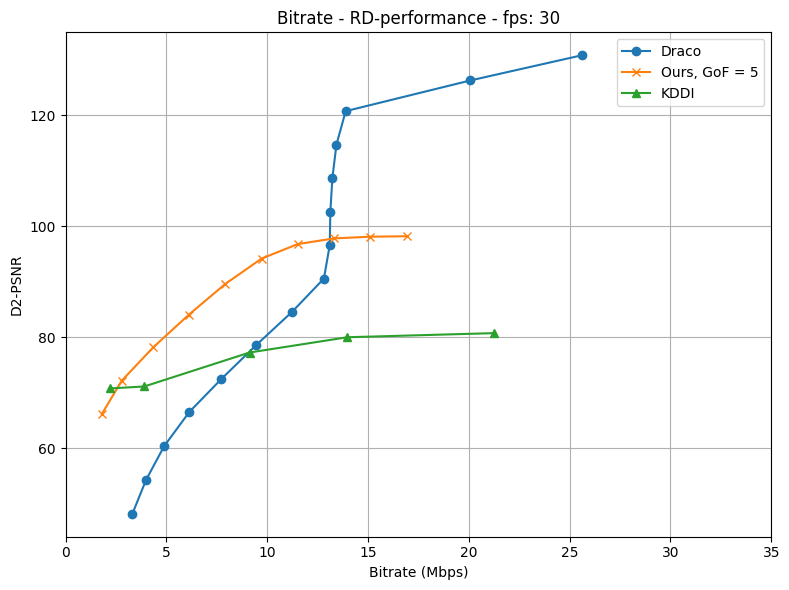

In [12]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10, 13.13, 13.23, 13.43, 13.89, 20.08, 25.61]  
D2_PSNR = [48.23, 54.34, 60.37, 66.54, 72.52, 78.56, 84.58, 90.57, 96.58, 102.63, 108.64, 114.65, 120.71, 126.24, 130.77] 


ours_Bitrates = [1.79, 2.78, 4.34, 6.12, 7.92, 9.72, 11.51, 13.31, 15.11, 16.91]    
ours_D2_PSNR = [66.15, 72.18, 78.18, 84.10, 89.61, 94.17, 96.78, 97.80, 98.11, 98.19] 

KDDI_Bitrates = [2.18, 3.90, 9.12, 13.97, 21.25]    
KDDI_D2_PSNR = [70.79, 71.15, 77.26, 80.01, 80.75] 


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D2_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D2_PSNR, marker='x', label='Ours, GoF = 5')
plt.plot(KDDI_Bitrates, KDDI_D2_PSNR, marker='^', label='KDDI')
plt.title('Bitrate - RD-performance - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D2-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()


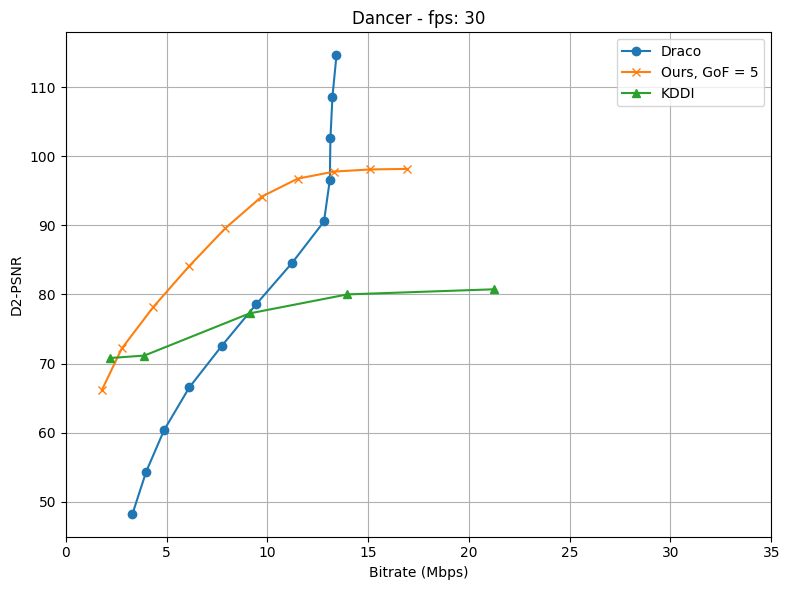

In [11]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10, 13.13, 13.23, 13.43]  
D2_PSNR = [48.23, 54.34, 60.37, 66.54, 72.52, 78.56, 84.58, 90.57, 96.58, 102.63, 108.64, 114.65] 


ours_Bitrates = [1.79, 2.78, 4.34, 6.12, 7.92, 9.72, 11.51, 13.31, 15.11, 16.91]    
ours_D2_PSNR = [66.15, 72.18, 78.18, 84.10, 89.61, 94.17, 96.78, 97.80, 98.11, 98.19] 

KDDI_Bitrates = [2.18, 3.90, 9.12, 13.97, 21.25]    
KDDI_D2_PSNR = [70.79, 71.15, 77.26, 80.01, 80.75] 


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D2_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D2_PSNR, marker='x', label='Ours, GoF = 5')
plt.plot(KDDI_Bitrates, KDDI_D2_PSNR, marker='^', label='KDDI')
plt.title('Dancer - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D2-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()
